In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [2]:
orthogroups = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Finalized_Orthology_Nov_15/Reformatted_orthogroup_table.csv"
)

In [3]:
orthogroups

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
2,Solyc01g066020,OG0000005,SlycHeinz4.0
3,Solyc05g024370,OG0000005,SlycHeinz4.0
4,Solyc11g011080,OG0000005,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,Solvio1_1.1.2
877266,Solvio1_11g011120,OG0044292,Solvio1_1.1.2
877267,Solvio1_11g018310,OG0044292,Solvio1_1.1.2
877268,Solvio1_11g011570,OG0044293,Solvio1_1.1.2


In [4]:
counts = orthogroups.groupby(["Orthogroup", "Species"]).count()
counts = counts.rename(columns={"Gene Name": "Num Genes"})

In [5]:
counts = counts.reset_index()
counts

,Orthogroup,Species,Num Genes
0,OG0000000,Smel4.1,87
1,OG0000000,Solabu2_1.1.2,72
2,OG0000000,Solaet3_1.5.2,79
3,OG0000000,Solame3_1.1.2,41
4,OG0000000,Solang8_1.1.2,92
...,...,...,...
655238,OG0044289,Solvio1_1.1.2,2
655239,OG0044290,Solvio1_1.1.2,2
655240,OG0044291,Solvio1_1.1.2,2
655241,OG0044292,Solvio1_1.1.2,2


(0.0, 1000.0)

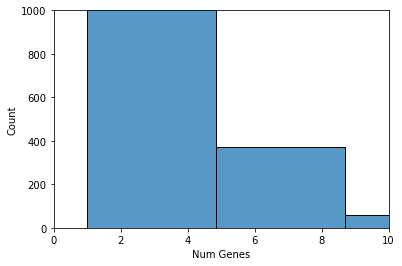

In [6]:
sns.histplot(data=counts.groupby("Orthogroup").median(), x="Num Genes", bins=20)
plt.xlim(0, 10)
plt.ylim(0, 1000)

In [7]:
counts.groupby("Orthogroup").median() == 2

,Num Genes
Orthogroup,
OG0000000,False
OG0000001,False
OG0000002,False
OG0000003,False
OG0000004,False
...,...
OG0044289,True
OG0044290,True
OG0044291,True


In [8]:
counts_median = counts.groupby("Orthogroup").median()
counts_paralogs = counts_median.loc[counts_median["Num Genes"] == 2]
counts_paralogs

,Num Genes
Orthogroup,
OG0000179,2.0
OG0000411,2.0
OG0000412,2.0
OG0000516,2.0
OG0000572,2.0
...,...
OG0044289,2.0
OG0044290,2.0
OG0044291,2.0


In [9]:
# counts_paralogs.to_csv(
#     "/data/passala/for_hamsini/list_of_orthogroups_used_paralogs.csv"
# )

In [10]:
orthogroups_paralogs_only = orthogroups.loc[
    orthogroups["Orthogroup"].isin(counts_paralogs.index)
]
orthogroups_paralogs_only

,Gene Name,Orthogroup,Species
1365,Solyc05g018484,OG0000179,SlycHeinz4.0
2223,Solyc10g007870,OG0000411,SlycHeinz4.0
2224,Solyc00g500047,OG0000412,SlycHeinz4.0
2541,Solyc04g007823,OG0000516,SlycHeinz4.0
2542,Solyc04g007825,OG0000516,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,Solvio1_1.1.2
877266,Solvio1_11g011120,OG0044292,Solvio1_1.1.2
877267,Solvio1_11g018310,OG0044292,Solvio1_1.1.2
877268,Solvio1_11g011570,OG0044293,Solvio1_1.1.2


In [11]:
paralog_count = orthogroups_paralogs_only.groupby(["Orthogroup", "Species"]).count()
paralog_count = paralog_count.reset_index()
paralog_count = paralog_count.rename(columns={"Gene Name": "Num Genes"})
paralog_count

,Orthogroup,Species,Num Genes
0,OG0000179,SlycHeinz4.0,1
1,OG0000179,Solabu2_1.1.2,3
2,OG0000179,Solame3_1.1.2,1
3,OG0000179,Solang8_1.1.2,3
4,OG0000179,Solcan1_1.1.2,2
...,...,...,...
58212,OG0044289,Solvio1_1.1.2,2
58213,OG0044290,Solvio1_1.1.2,2
58214,OG0044291,Solvio1_1.1.2,2
58215,OG0044292,Solvio1_1.1.2,2


In [12]:
tissue_directory = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Final_species_RNA_data/sample_to_tissue.csv",
    sep="\t",
)
tissue_directory = tissue_directory.replace(
    {
        "apices": "Apex",
        "coty": "Cotyledon",
        "In": "Inflorescence",
        "leaves": "Leaf",
        "hypo": "Hypocotyl",
        "pric": "Prickle",
        "fruit": "Fruit",
        "flower": "Flower",
        "meristem": "Meristem",
    }
)
tissue_directory

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
0,abutiloides,Sabu2,Apex,Sabu2_apices_2_S11,46869976.0,88.2758,3.39319,8.33102,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
1,abutiloides,Sabu2,Apex,Sabu2_apices_3_S17,42814613.0,86.7834,3.17339,10.04320,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
2,aethiopicum,Saet3,Apex,Saet3_apices_1_S1,31885899.0,88.5922,4.63972,6.76812,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
3,aethiopicum,Saet3,Apex,Saet3_apices_2_S2,31235923.0,88.5767,4.57639,6.84692,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
4,aethiopicum,Saet3,Apex,Saet3_apices_3_S3,31476966.0,88.9584,4.59573,6.44585,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
...,...,...,...,...,...,...,...,...,...,...
258,lycopercicum,M82,Meristem,M82_SIM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
259,lycopercicum,M82,Meristem,M82_SYM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
260,lycopercicum,M82,Meristem,M82_SYM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
261,lycopercicum,M82,Meristem,M82_TM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...


In [13]:
sensible_species_names = {
    "Solabu2_1.1.2": "abutiloides",
    "Solaet3_1.5.2": "aethiopicum",
    "Solame3_1.1.2": "americanum",
    "Solang8_1.1.2": "anguivi",
    "Solcan1_1.1.2": "candidum",
    "Solcit1_1.1.2": "citrullifolium",
    "Solcle2_1.2.2": "cleistogamum",
    "Soletu1_1.2.2": "etuberosum",
    "Solgig1_1.2.2": "giganteum",
    "Solhav1_1.2.2": "havanense",
    "Solins1_1.1.2": "insanum",
    "Sollin1_1.2.2": "linearifolium",
    "Solmac3_1.5.2": "macrocarpon",
    "Solmam1_1.1.2": "mammosum",
    "Solmur2hap1_1.3.2": "muricatum1",
    "Solmur2hap2_1.3.2": "muricatum2",
    "Solpri1_1.3.2": "prinophyllum",
    "Solpse1_1.1.2.3.2": "pseudolulo",
    "Solqui2_1.3.2": "quitoense",
    "Solrob1_1.2.2": "robustum",
    "Solstr1_1.1.2": "stramoniifolium",
    "Soltor1_1.1.2": "torvum",
    "Solvio1_1.1.2": "violaceum",
}

In [14]:
paralog_count = paralog_count.replace(sensible_species_names)
paralog_count = paralog_count.loc[paralog_count["Species"] != "SlycHeinz4.0"]
paralog_count

,Orthogroup,Species,Num Genes
1,OG0000179,abutiloides,3
2,OG0000179,americanum,1
3,OG0000179,anguivi,3
4,OG0000179,candidum,2
5,OG0000179,citrullifolium,10
...,...,...,...
58212,OG0044289,violaceum,2
58213,OG0044290,violaceum,2
58214,OG0044291,violaceum,2
58215,OG0044292,violaceum,2


In [15]:
gene_ortho_map = orthogroups_paralogs_only.replace(sensible_species_names)
gene_ortho_map

,Gene Name,Orthogroup,Species
1365,Solyc05g018484,OG0000179,SlycHeinz4.0
2223,Solyc10g007870,OG0000411,SlycHeinz4.0
2224,Solyc00g500047,OG0000412,SlycHeinz4.0
2541,Solyc04g007823,OG0000516,SlycHeinz4.0
2542,Solyc04g007825,OG0000516,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,violaceum
877266,Solvio1_11g011120,OG0044292,violaceum
877267,Solvio1_11g018310,OG0044292,violaceum
877268,Solvio1_11g011570,OG0044293,violaceum


In [16]:
sample_names = tissue_directory[["Species", "Sample"]].drop_duplicates()
sample_names = sample_names[:-1]
sample_names

,Species,Sample
0,abutiloides,Sabu2
2,aethiopicum,Saet3
23,americanum,Same3
38,anguivi,Sang8
54,candidum,Scan1
70,citrullifolium,Scit1
87,cleistogamum,Scle2
99,etuberosum,Setu1
106,giganteum,Sgig1
109,havanense,Shav1


In [17]:
ortho_expression_frame = pd.DataFrame(index=counts_paralogs.index)
ortho_expression_frame

""
Orthogroup
OG0000179
OG0000411
OG0000412
OG0000516
OG0000572
...
OG0044289
OG0044290
OG0044291


In [18]:
for species in sample_names.iterrows():
    sample_id = species[1][1]
    species_id = species[1][0]
    file_name = "/data/suresh/pansol/counts/" + sample_id + "_TPM_counts.csv"
    current_rna_file = pd.read_csv(file_name)
    current_rna_file.index = current_rna_file.index.str.split(":").str[1]
    avg_expression = pd.DataFrame(
        current_rna_file.mean(axis=1), columns=["Avg Expression"]
    )
    current_species_genes = gene_ortho_map.loc[gene_ortho_map["Species"] == species_id]
    added_ortho = avg_expression.merge(
        right=current_species_genes[["Gene Name", "Orthogroup"]],
        left_index=True,
        right_on="Gene Name",
    )
    ortho_avgs = added_ortho.groupby("Orthogroup").mean()
    ortho_expression_frame = ortho_expression_frame.merge(
        how="left", right=ortho_avgs, left_index=True, right_index=True
    ).rename(columns={"Avg Expression": species_id})

In [19]:
ortho_expression_frame.mean(axis=1)

Orthogroup
OG0000179       2.561265
OG0000411    2414.040608
OG0000412       6.844705
OG0000516      14.861063
OG0000572       1.158473
                ...     
OG0044289       0.000000
OG0044290       0.000000
OG0044291       0.000000
OG0044292       0.000000
OG0044293       0.000000
Length: 3762, dtype: float64

In [20]:
ortho_groups_and_number_of_genes_present_in_each_species = pd.DataFrame(
    index=counts_paralogs.index
)
for species in sample_names.iterrows():
    sample_id = species[1][1]
    species_id = species[1][0]
    current_list_of_genes = gene_ortho_map.loc[gene_ortho_map["Species"] == species_id]
    all_orthogroups_number_present = []
    for orthogroup in counts_paralogs.index:
        genes_in_orthogroup = current_list_of_genes.loc[
            current_list_of_genes["Orthogroup"] == orthogroup
        ]
        numb_of_that_gene_in_species = len(genes_in_orthogroup)
        all_orthogroups_number_present.append(numb_of_that_gene_in_species)
    ortho_groups_and_number_of_genes_present_in_each_species[
        species_id
    ] = all_orthogroups_number_present

In [21]:
ortho_expression_frame.mean(axis=1)

Orthogroup
OG0000179       2.561265
OG0000411    2414.040608
OG0000412       6.844705
OG0000516      14.861063
OG0000572       1.158473
                ...     
OG0044289       0.000000
OG0044290       0.000000
OG0044291       0.000000
OG0044292       0.000000
OG0044293       0.000000
Length: 3762, dtype: float64

In [22]:
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,mammosum,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,14,1,2,6,0,1,0,5,91,1
OG0000411,2,13,13,12,2,2,2,1,3,0,...,1,4,4,4,0,1,2,2,2,9
OG0000412,1,4,1,3,7,1,1,1,4,2,...,9,1,0,4,0,4,1,2,1,16
OG0000516,0,2,10,2,11,3,2,3,2,4,...,4,2,2,2,0,10,2,6,2,2
OG0000572,8,1,10,1,2,2,1,10,0,4,...,2,6,5,1,0,2,7,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [29]:

ortho_groups_and_number_of_genes_present_in_each_species < 2

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,False,True,True,False,False,False,True,False,False,False,...,True,False,False,True,True,True,False,False,True,False
OG0000411,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
OG0000412,True,False,True,False,False,True,True,True,False,False,...,True,True,False,True,False,True,False,True,False,False
OG0000516,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
OG0000572,False,True,False,True,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
OG0044290,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
OG0044291,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False


In [23]:
ortho_groups_and_number_of_genes_present_in_each_species["Frequency of Gene Loss"] = (
    ortho_groups_and_number_of_genes_present_in_each_species < 2
).sum(axis=1)

In [27]:
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum1,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,1,2,6,0,1,0,5,91,1,9
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,4,0,1,2,2,2,9,5
OG0000412,1,4,1,3,7,1,1,1,4,2,...,1,0,4,0,4,1,2,1,16,10
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,2,0,10,2,6,2,2,2
OG0000572,8,1,10,1,2,2,1,10,0,4,...,6,5,1,0,2,7,2,6,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,22


In [28]:
ortho_groups_and_number_of_genes_present_in_each_species.max()

abutiloides               10
aethiopicum               13
americanum                19
anguivi                   21
candidum                  20
citrullifolium            33
cleistogamum               9
etuberosum                13
giganteum                  9
havanense                 10
insanum                   13
linearifolium             11
macrocarpon               12
mammosum                  15
muricatum1                 9
muricatum2                12
prinophyllum              20
pseudolulo                 0
quitoense                 12
robustum                  10
stramoniifolium           12
torvum                    91
violaceum                 16
Frequency of Gene Loss    23
dtype: int64

In [30]:
ortho_groups_and_number_of_genes_present_in_each_species[
    "Mean Group Expression"
] = ortho_expression_frame.mean(axis=1)
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss,Mean Group Expression
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,2,6,0,1,0,5,91,1,9,2.561265
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,0,1,2,2,2,9,5,2414.040608
OG0000412,1,4,1,3,7,1,1,1,4,2,...,0,4,0,4,1,2,1,16,10,6.844705
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,0,10,2,6,2,2,2,14.861063
OG0000572,8,1,10,1,2,2,1,10,0,4,...,5,1,0,2,7,2,6,1,9,1.158473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000


In [31]:
paralog_count

,Orthogroup,Species,Num Genes
1,OG0000179,abutiloides,3
2,OG0000179,americanum,1
3,OG0000179,anguivi,3
4,OG0000179,candidum,2
5,OG0000179,citrullifolium,10
...,...,...,...
58212,OG0044289,violaceum,2
58213,OG0044290,violaceum,2
58214,OG0044291,violaceum,2
58215,OG0044292,violaceum,2


In [32]:
paralog_count.loc[paralog_count["Num Genes"] < 2].value_counts(subset="Orthogroup")

Orthogroup
OG0001274    13
OG0003334    12
OG0001982    12
OG0003430    12
OG0003424    12
             ..
OG0001836     1
OG0001837     1
OG0001841     1
OG0001845     1
OG0032047     1
Length: 2427, dtype: int64

In [33]:
sample_id

'Svio1'

In [34]:
orthogroups = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Orthogroups.tsv",
    sep="\t",
)

In [35]:
ortho_groups_and_number_of_genes_present_in_each_species  #### OG0002827	 is very cool! Lost in Aethiopicum, OG0005089 is lost in everything but tomato

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss,Mean Group Expression
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,2,6,0,1,0,5,91,1,9,2.561265
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,0,1,2,2,2,9,5,2414.040608
OG0000412,1,4,1,3,7,1,1,1,4,2,...,0,4,0,4,1,2,1,16,10,6.844705
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,0,10,2,6,2,2,2,14.861063
OG0000572,8,1,10,1,2,2,1,10,0,4,...,5,1,0,2,7,2,6,1,9,1.158473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,22,0.000000


In [36]:
ortho_groups_and_number_of_genes_present_in_each_species == 2

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss,Mean Group Expression
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,False,False,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
OG0000411,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,True,True,True,False,False,False
OG0000412,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
OG0000516,False,True,False,True,False,False,True,False,True,False,...,True,True,False,False,True,False,True,True,True,False
OG0000572,False,False,False,False,True,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
OG0044290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
OG0044291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
ortho_groups_and_number_of_genes_present_in_each_species["Frequency of Gene Loss"] = (
    ortho_groups_and_number_of_genes_present_in_each_species < 2
).sum(axis=1)

In [38]:
ortho_groups_and_number_of_genes_present_in_each_species

,abutiloides,aethiopicum,americanum,anguivi,candidum,citrullifolium,cleistogamum,etuberosum,giganteum,havanense,...,muricatum2,prinophyllum,pseudolulo,quitoense,robustum,stramoniifolium,torvum,violaceum,Frequency of Gene Loss,Mean Group Expression
Orthogroup,,,,,,,,,,,,,,,,,,,,,
OG0000179,3,0,1,3,2,10,1,12,2,6,...,2,6,0,1,0,5,91,1,9,2.561265
OG0000411,2,13,13,12,2,2,2,1,3,0,...,4,4,0,1,2,2,2,9,5,2414.040608
OG0000412,1,4,1,3,7,1,1,1,4,2,...,0,4,0,4,1,2,1,16,10,6.844705
OG0000516,0,2,10,2,11,3,2,3,2,4,...,2,2,0,10,2,6,2,2,2,14.861063
OG0000572,8,1,10,1,2,2,1,10,0,4,...,5,1,0,2,7,2,6,1,10,1.158473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0044289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,23,0.000000
OG0044290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,23,0.000000
OG0044291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,23,0.000000


In [40]:
ortho_groups_and_number_of_genes_present_in_each_species.loc[
    ortho_groups_and_number_of_genes_present_in_each_species["Frequency of Gene Loss"]
    == 22
].sort_values(by="Mean Group Expression", ascending= False).iloc[0]

abutiloides                 0.000000
aethiopicum                 0.000000
americanum                  0.000000
anguivi                     0.000000
candidum                    0.000000
citrullifolium              0.000000
cleistogamum                0.000000
etuberosum                  2.000000
giganteum                   0.000000
havanense                   0.000000
insanum                     0.000000
linearifolium               0.000000
macrocarpon                 0.000000
mammosum                    0.000000
muricatum1                  0.000000
muricatum2                  0.000000
prinophyllum                0.000000
pseudolulo                  0.000000
quitoense                   0.000000
robustum                    0.000000
stramoniifolium             0.000000
torvum                      0.000000
violaceum                   0.000000
Frequency of Gene Loss     22.000000
Mean Group Expression     459.545086
Name: OG0026515, dtype: float64

(0.0, 100.0)

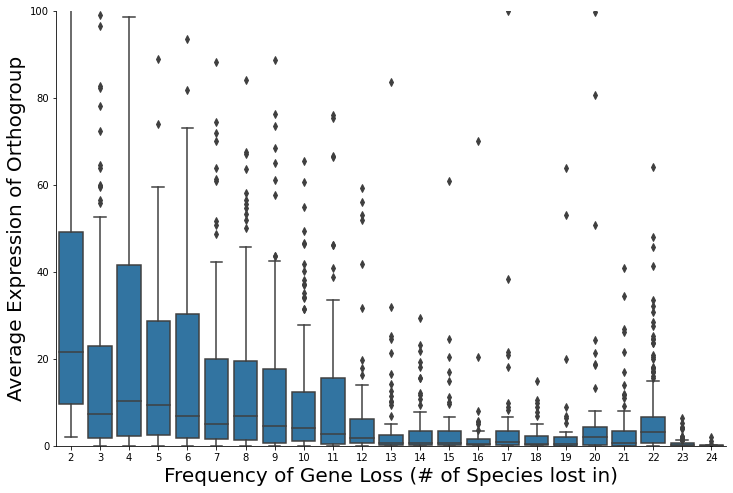

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
# ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.boxplot(
    data=ortho_groups_and_number_of_genes_present_in_each_species,
    x="Frequency of Gene Loss",
    y="Mean Group Expression",
    color="tab:blue",
)

plt.ylabel("Average Expression of Orthogroup", fontsize=20)
plt.xlabel("Frequency of Gene Loss (# of Species lost in)", fontsize=20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
plt.ylim((0, 100))
# plt.title(
#     "Orthogroups that experience gene loss more frequently are expressed at lower levels",
#     fontsize=20,
# )
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [2]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
# ax = sns.stripplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', jitter = .25, s = 6, color= 'tab:blue')
ax = sns.boxplot(
    data=ortho_groups_and_number_of_genes_present_in_each_species,
    x="Frequency of Gene Loss",
    y="Mean Group Expression",
    color="tab:blue",
)

plt.ylabel("Average Expression of Orthogroup", fontsize=20)
plt.xlabel("Frequency of Gene Loss", fontsize=20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
plt.ylim((0, 100))
# plt.title(
#     "Orthogroups that experience gene loss more frequently are expressed at lower levels",
#     fontsize=20,
# )
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

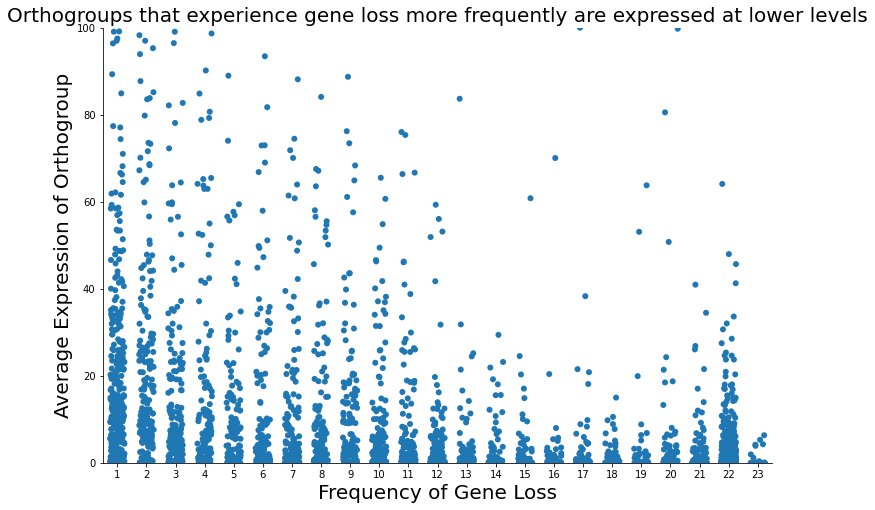

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.stripplot(
    data=ortho_groups_and_number_of_genes_present_in_each_species,
    x="Frequency of Gene Loss",
    y="Mean Group Expression",
    jitter=0.25,
    s=6,
    color="tab:blue",
)
# ax = sns.boxplot(data = ortho_groups_and_number_of_genes_present_in_each_species, x ='Frequency of Gene Loss', y = 'Mean Group Expression', color= 'tab:blue')

plt.ylabel("Average Expression of Orthogroup", fontsize=20)
plt.xlabel("Frequency of Gene Loss", fontsize=20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
plt.ylim((0, 100))
plt.title(
    "Orthogroups that experience gene loss more frequently are expressed at lower levels",
    fontsize=20,
)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

#### Check for tomato paralogs FC vs Frequency of gene loss, in tissue specific in other notebook check for how often the paralog pair "flips" - one at zero the other high, between replicates

In [23]:
averaged_hamsini_shorlist = hamsini_shortlist.groupby("OGs").mean()

/tmp/ipykernel_2535444/862986761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_hamsini_shorlist = hamsini_shortlist.groupby('OGs').mean()


In [24]:
averaged_hamsini_shorlist

,coexp_atlas,coexp_tissue,FC_atlas,spec_atlas,FC_tissue,spec_tissue,numtissue_atlas,new_coexp_atlas,log2FC_min_atlas,log2FC_max_atlas,log2FC_mean_atlas,log2FC_sd_atlas,numtissue_tissue,new_coexp_tissue,log2FC_min_tissue,log2FC_max_tissue,log2FC_mean_tissue,log2FC_sd_tissue
OGs,,,,,,,,,,,,,,,,,,
OG0000026,0.998285,0.993574,0.898951,0.816646,0.997247,0.997916,16.75,0.990954,1.534041,3.116794,2.160348,0.438131,10.500000,0.972608,0.684299,3.434178,1.891482,0.939671
OG0000033,0.997613,0.882802,0.898274,0.796348,0.934411,0.911762,13.00,0.977798,3.471106,4.672119,4.364960,0.335908,2.000000,1.000000,8.917159,8.986980,8.952069,0.049371
OG0000036,0.913939,0.994679,0.957427,0.957967,0.982071,0.971651,17.00,0.714344,3.424157,4.909658,4.014056,0.441753,12.000000,0.976230,-2.321928,1.691236,0.505026,1.179257
OG0000040,0.990990,0.989395,0.948935,0.896823,0.979978,0.969120,17.00,0.955833,1.394612,3.085836,2.067478,0.422450,10.333333,0.953115,-0.659985,1.744110,0.560098,0.691736
OG0000074,0.943316,0.985640,0.981471,0.984580,0.960984,0.942815,17.00,0.814320,1.247583,2.467877,1.850599,0.373107,12.000000,0.960658,-0.193844,2.428370,0.757680,0.911396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0006221,0.959889,0.692153,0.822121,0.844025,0.822639,0.690808,8.00,0.827618,1.728475,2.929909,2.042617,0.370602,1.000000,NaN,5.321928,5.321928,5.321928,NaN
OG0008314,0.988990,0.463262,0.947735,0.898457,0.297676,0.148351,7.00,0.391873,1.725931,2.383131,2.085396,0.241926,1.000000,NaN,-1.000000,-1.000000,-1.000000,NaN
OG0008506,0.939124,0.980108,0.979775,0.996383,0.995865,0.996091,17.00,0.786237,2.933543,4.389846,3.871429,0.389279,12.000000,0.939008,-1.584963,-0.316027,-1.068042,0.337460


In [25]:
ortho_groups_and_number_of_genes_present_in_each_species = (
    ortho_groups_and_number_of_genes_present_in_each_species.merge(
        averaged_hamsini_shorlist[["numtissue_atlas"]],
        left_index=True,
        right_index=True,
    )
)
ortho_groups_and_number_of_genes_present_in_each_species

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss,Mean Group Expression,numtissue_atlas
OG0004518,2,0,0,0,0,0,0,6,5.196501,10.0
OG0002370,2,2,2,2,2,2,2,0,34.298456,17.0
OG0004746,0,0,0,2,0,0,0,6,47.304014,17.0
OG0002282,2,2,2,2,2,2,2,0,22.543973,17.0
OG0004745,0,0,0,0,0,0,0,7,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...
OG0000909,3,3,3,2,3,3,4,0,292.574212,17.0
OG0002609,2,2,2,2,2,2,0,1,25.863955,17.0
OG0002146,2,2,2,2,2,2,2,0,18.646802,17.0
OG0005350,0,0,0,0,0,0,0,7,NaN,17.0


Text(0.5, 1.0, 'Orthogroups that experience gene loss more frequently are expressed at lower levels')

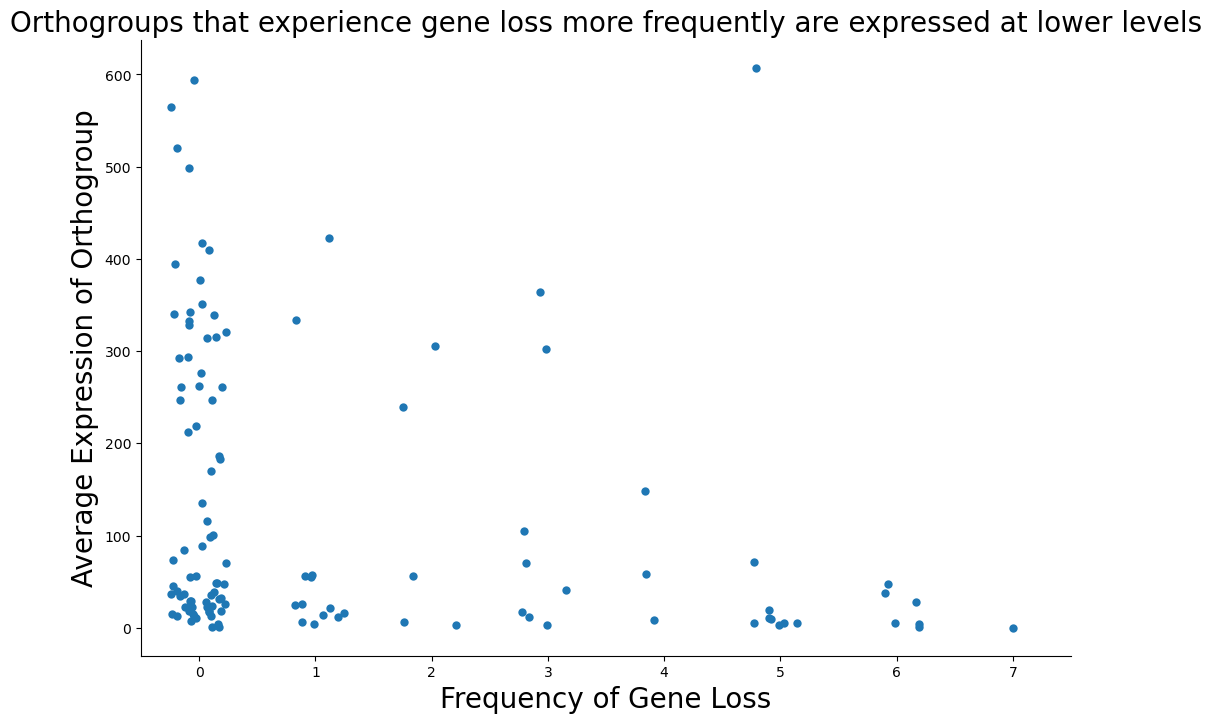

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.stripplot(
    data=ortho_groups_and_number_of_genes_present_in_each_species,
    x="Frequency of Gene Loss",
    y="Mean Group Expression",
    jitter=0.25,
    s=6,
)
plt.ylabel("Average Expression of Orthogroup", fontsize=20)
plt.xlabel("Frequency of Gene Loss", fontsize=20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title(
    "Orthogroups that experience gene loss more frequently are expressed at lower levels",
    fontsize=20,
)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [27]:
ortho_groups_and_number_of_genes_present_in_each_species.loc[
    ortho_groups_and_number_of_genes_present_in_each_species["Frequency of Gene Loss"]
    == 5
]

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense,Frequency of Gene Loss,Mean Group Expression,numtissue_atlas
OG0002916,0,0,0,2,3,0,0,5,607.297020,17.0
OG0003928,0,2,0,0,0,0,2,5,19.007068,17.0
OG0003623,0,0,0,0,0,3,2,5,5.051115,13.0
OG0004456,0,0,0,2,2,0,0,5,71.473047,17.0
OG0003777,2,0,2,0,0,1,0,5,9.102651,17.0
OG0001389,1,1,2,1,1,2,1,5,3.205305,12.0
OG0004203,0,0,2,2,0,0,0,5,4.766507,15.0
OG0004207,0,2,0,0,0,0,2,5,10.873513,10.0
OG0002371,0,0,0,5,7,0,0,5,5.535660,5.0


In [28]:
hamsini_table.loc[hamsini_table["OGs"] == "OG0002916"]

,Gene1,Gene2,OGs,coexp_atlas,coexp_tissue,FC_atlas,spec_atlas,FC_tissue,spec_tissue,numtissue_atlas,...,log2FC_min_atlas,log2FC_max_atlas,log2FC_mean_atlas,log2FC_sd_atlas,numtissue_tissue,new_coexp_tissue,log2FC_min_tissue,log2FC_max_tissue,log2FC_mean_tissue,log2FC_sd_tissue
22901,Solyc01g006160,Solyc01g016470,OG0002916,0.985787,0.980717,0.976523,0.975551,0.959994,0.937371,17.0,...,1.301337,2.557329,1.719172,0.302994,12.0,0.940311,1.028561,7.112005,2.973675,2.395045
22902,Solyc01g006160,Solyc01g104370,OG0002916,0.981593,0.992898,0.994411,0.995511,0.983864,0.974032,17.0,...,0.691956,1.613447,1.149202,0.269535,12.0,0.970568,-0.460014,5.317413,1.113008,2.431658
22903,Solyc01g016470,Solyc01g104370,OG0002916,0.962277,0.997757,0.983468,0.986403,0.991141,0.991958,17.0,...,-1.293867,-0.187576,-0.569970,0.321367,12.0,0.988035,-2.559550,-1.415037,-1.860667,0.385346


<AxesSubplot:xlabel='Frequency of Gene Loss', ylabel='numtissue_atlas'>

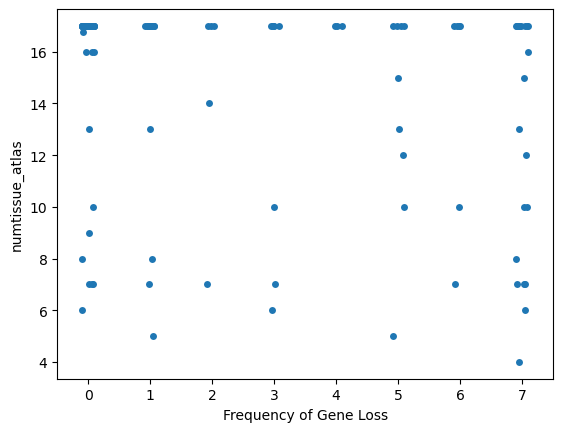

In [54]:
sns.stripplot(
    data=ortho_groups_and_number_of_genes_present_in_each_species,
    x="Frequency of Gene Loss",
    y="numtissue_atlas",
)

In [55]:
#### 1 or zero represents loss vs tomato
#### Find lost

In [68]:
(ortho_groups_and_number_of_genes_present_in_each_species < 3).all(axis=1)

OG0002827     True
OG0005089     True
OG0001699    False
OG0000192    False
OG0000040    False
             ...  
OG0000909    False
OG0001962     True
OG0001389     True
OG0002386     True
OG0001059    False
Length: 139, dtype: bool

In [69]:
ortho_groups_and_number_of_genes_present_in_each_species.loc[
    (ortho_groups_and_number_of_genes_present_in_each_species < 3).all(axis=1)
]

,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense
OG0002827,0,2,2,2,2,2,2
OG0005089,0,0,0,0,0,0,0
OG0005408,0,0,0,0,0,0,0
OG0023112,0,0,0,0,0,0,0
OG0002577,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
OG0003580,0,0,2,2,2,2,0
OG0004370,0,0,0,0,0,0,0
OG0001962,2,2,2,2,2,2,1
OG0001389,1,1,2,1,1,2,1


(0.0, 1000.0)

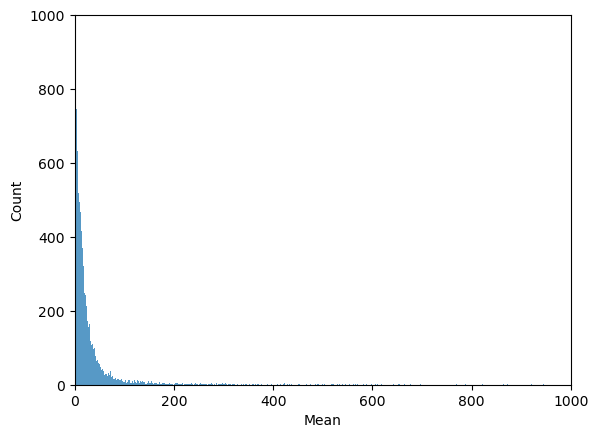

In [35]:
sns.histplot(rna_normalized_data["Quitoense"]["Mean"])
plt.xlim((0, 1000))
plt.ylim((0, 1000))

In [ ]:
### Block for when groups are bigger than 2
# list_of_gene_pairs_in_ortho_group = []
# for ortho in set(quitoense_long_df['Orthogroup']):
#     matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
#     all_combinations_in_orthogroup = list(itertools.combinations(matched_long_df['Gene'].to_list(),2))
#     list_of_gene_pairs_in_ortho_group.extend(all_combinations_in_orthogroup)